<a href="https://colab.research.google.com/github/waelrash1/time_series_forecasting_dt302-2/blob/main/ACF_and_PACF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*italicised text*# ACF and PACF

## PACF

Let’s suppose you have time series data in front of you, and you have
plotted the series as well as plotted the ACF. Unless you have created
the data yourself, say with arima.sim(), or if you have good knowledge
of the physical process that generated your time series, it’s not easy to
tell from the time series data alone just what the generating process is.
Now the ACF is one of our primary tools for characterizing an
autoregressive or moving average process. We’ve already seen how to the ACF as a formula for MA(q) and AR(p) processes and learned to
predict the characteristic shapes which occur in the ACF for these
simple processes. First, the “good news”:
A moving average process of order q has an ACF that cuts after q lags. 
Example: if you have an MA(q) process with enough terms that you
believe the ACF is well estimated, and the ACF cuts o after 4 lags, you
can be reasonably sure you have an MA(4) process.
Remember that MA(1) can be written as follows

## Moving Average MA(q)

$$ X_t = Z_t + \theta_1 Z_{t-1} $$

Using the backshift operator, the model MA(1) can be written in this form: 

$$ X_t = \Theta(B)Z_t $$

Where $$  \Theta(B)= (1+ \theta_1B)$$

### Simulation of MA

In [1]:
# MA(1)
coef=c(.5)

In [2]:
#set.seed(1)
x.ts= arima.sim(list(ma=coef),n=10000)

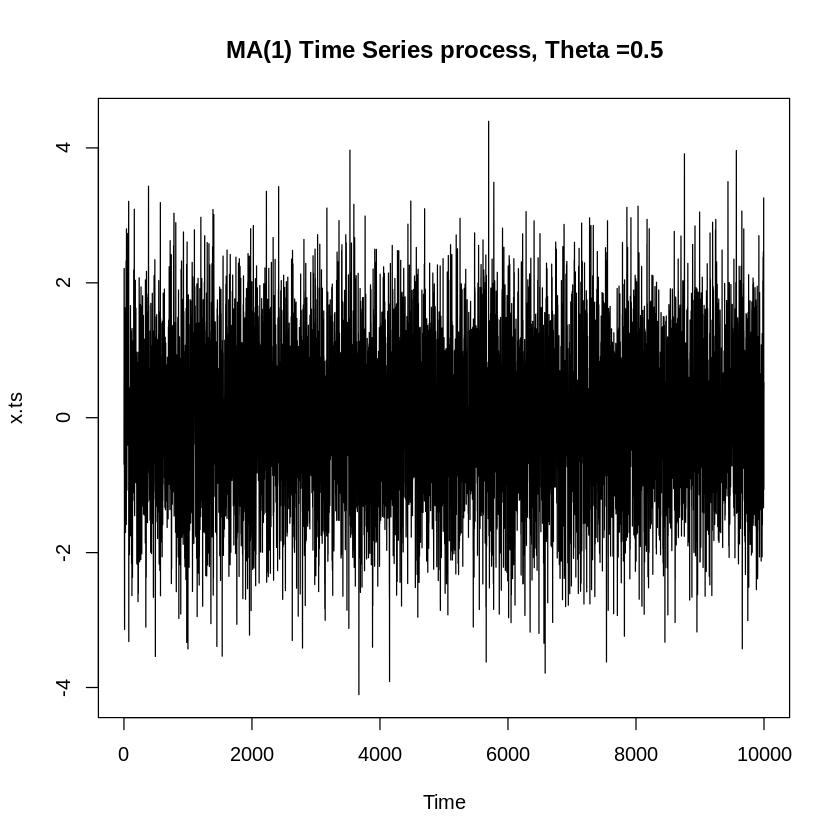

In [4]:
plot(x.ts, main='MA(1) Time Series process, Theta =0.5')

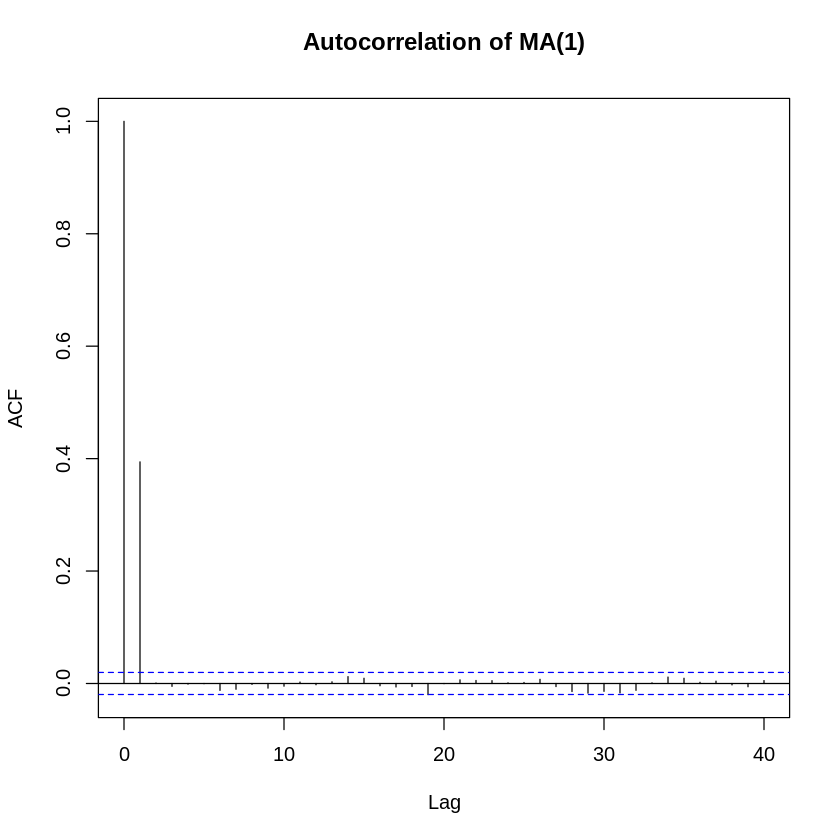

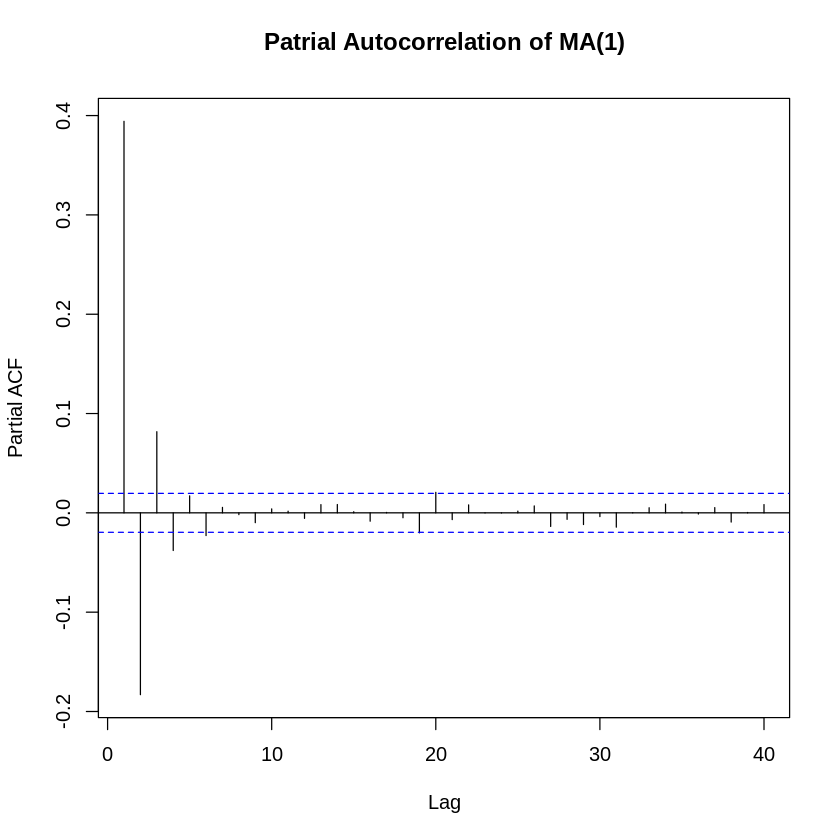

In [5]:
acf(x.ts, type='correlation', main='Autocorrelation of MA(1)')
acf(x.ts, type='partial', main='Patrial Autocorrelation of MA(1)')

## Simulate MA(q) for various values

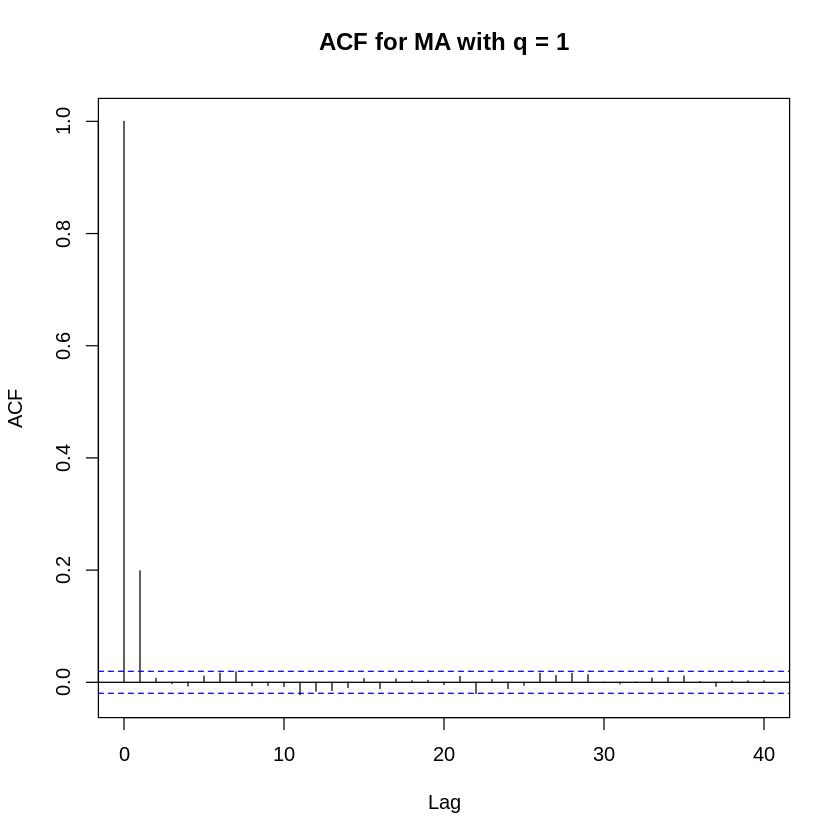

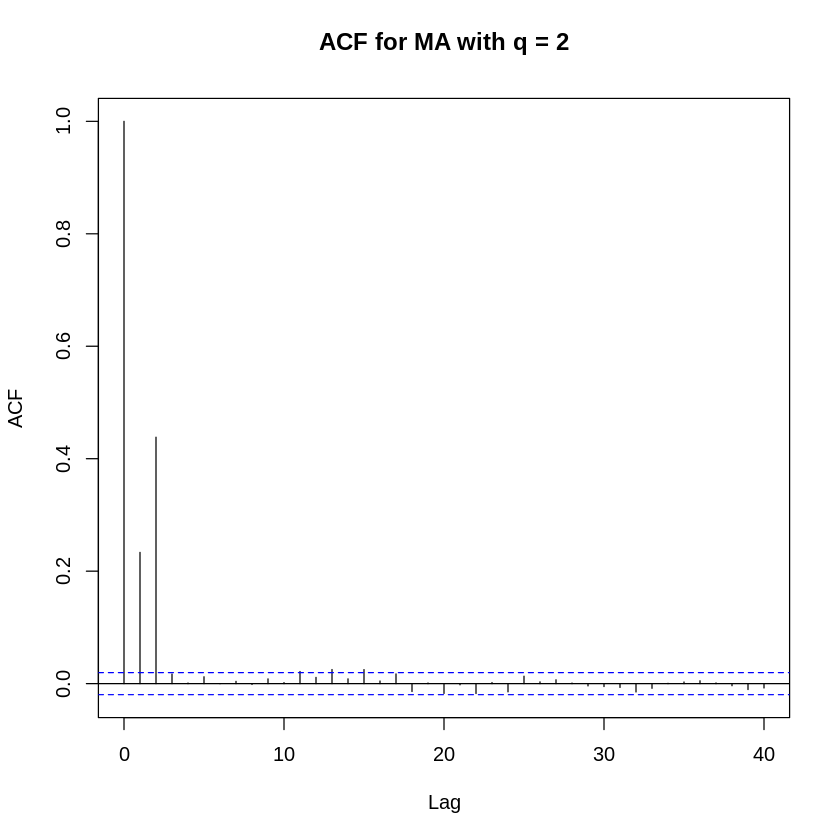

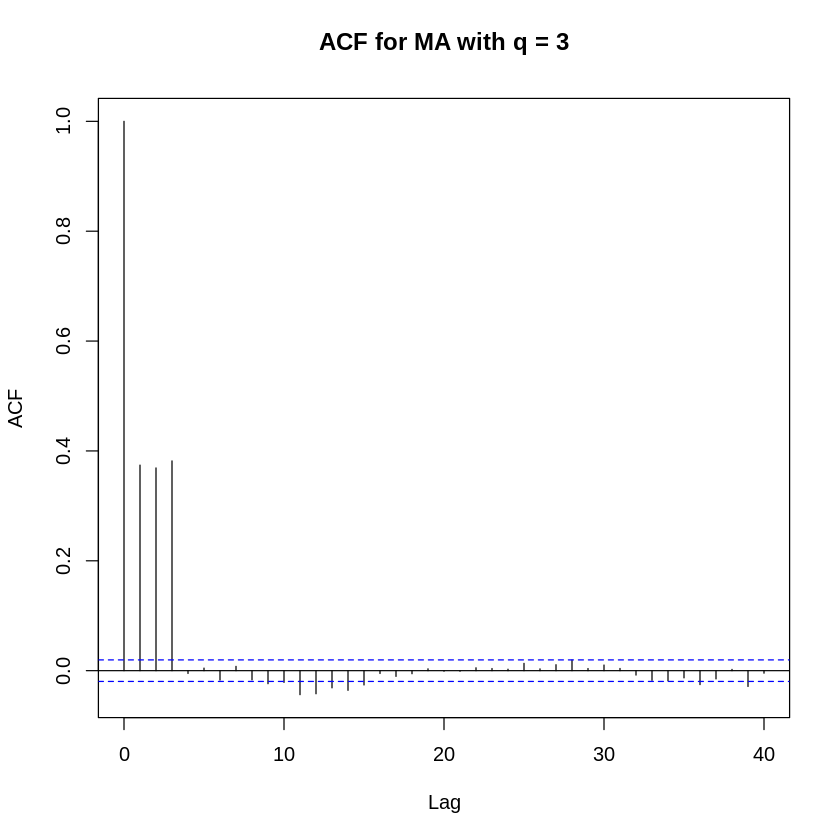

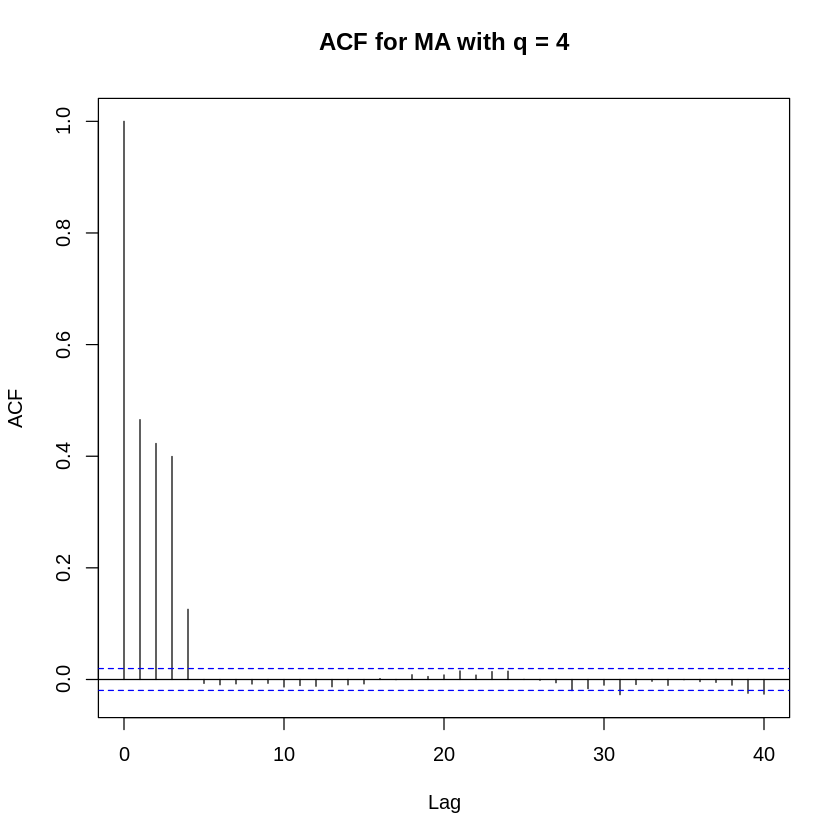

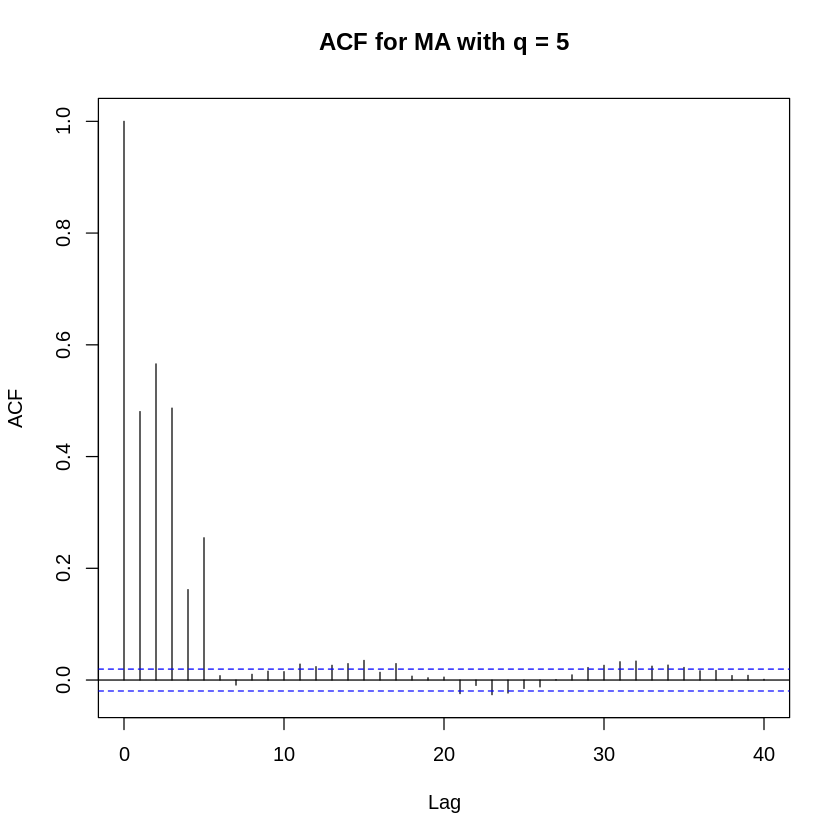

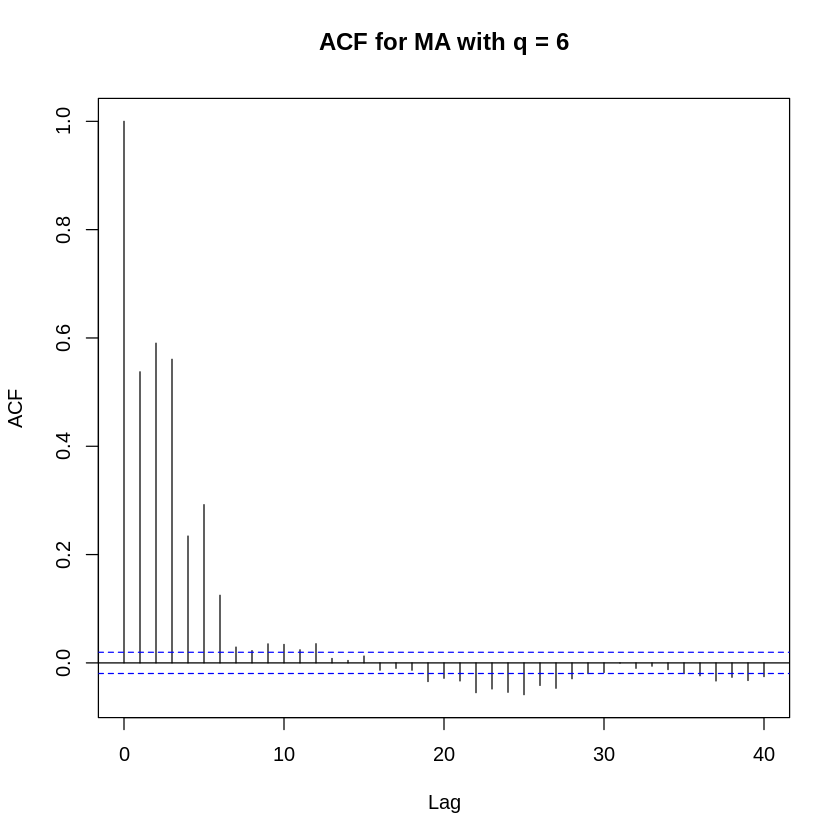

In [6]:
set.seed(10)
coef= c(.2,.6,.8,.3,.7,.3)

for(i in 1: length(coef))
    {
    
    x.ts <- arima.sim(list(ma= coef[1:i]), n=10000)
    acf=acf(x.ts, main=paste('ACF for MA with q =', i))
}

> A Pure Moving average of order q has an ACF that cuts-off after q lags.

# Simulation of AR process

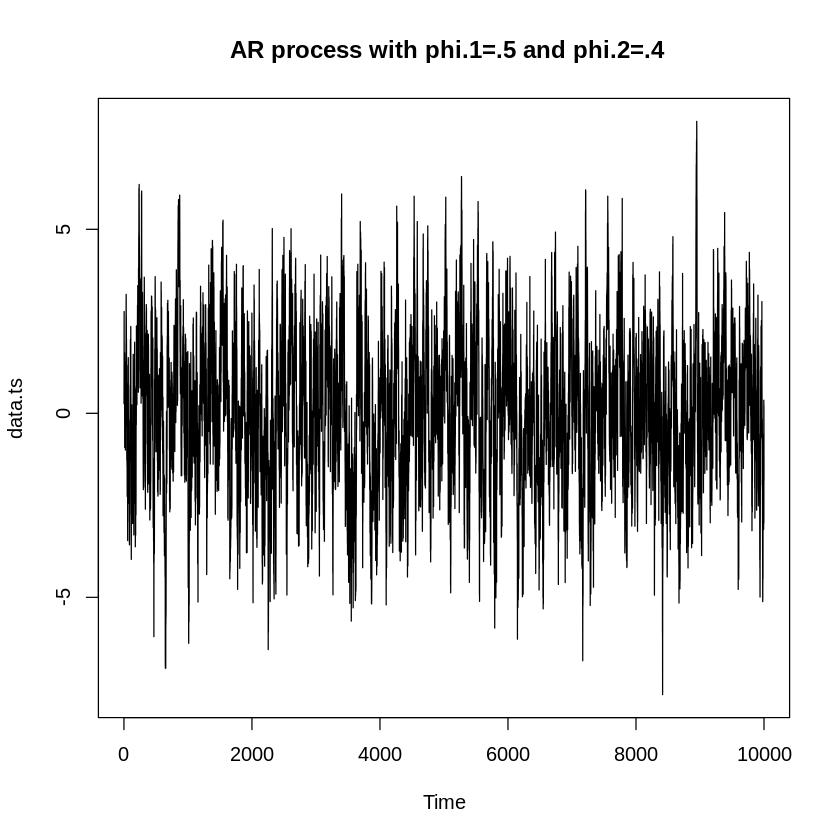

In [22]:
set.seed(10)
phi.1=.5
phi.2=.4
data.ts= arima.sim(list(ar = c(phi.1,phi.2)), n=10000)
plot(data.ts, main=' AR process with phi.1=.5 and phi.2=.4')

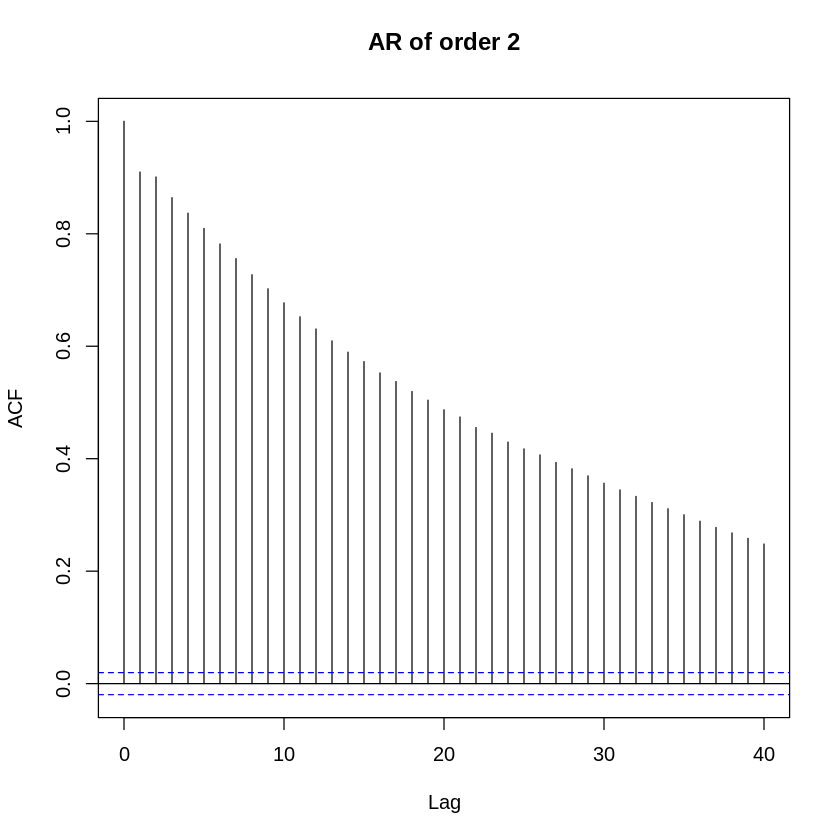

In [19]:
acf(data.ts, main="AR of order 2")

## Partial Autocorrelation PACF

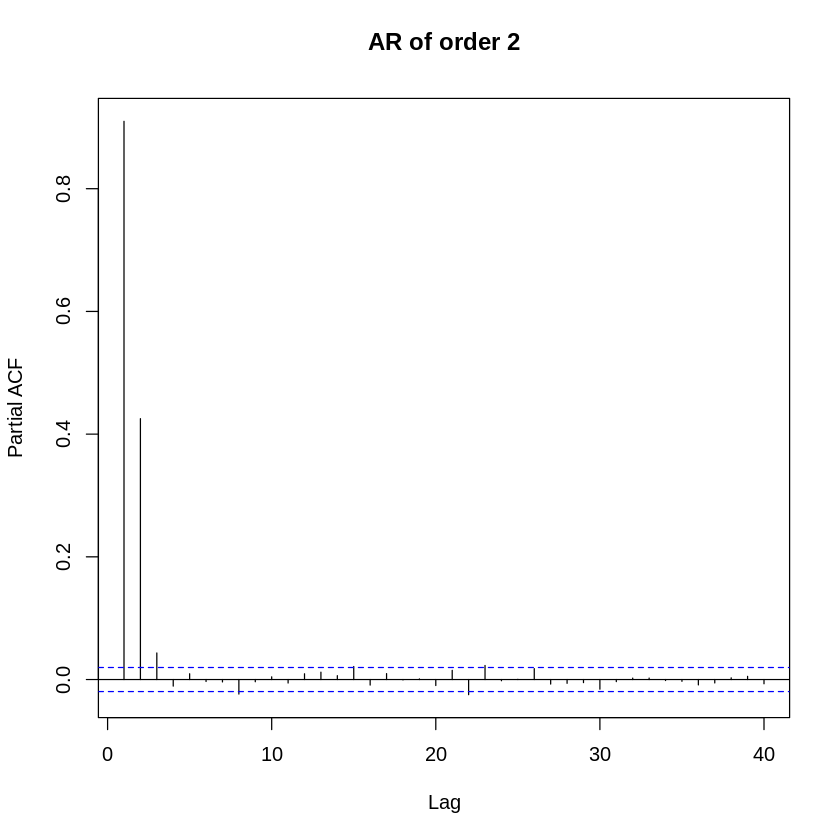

In [20]:
acf(data.ts, type='partial', main="AR of order 2")

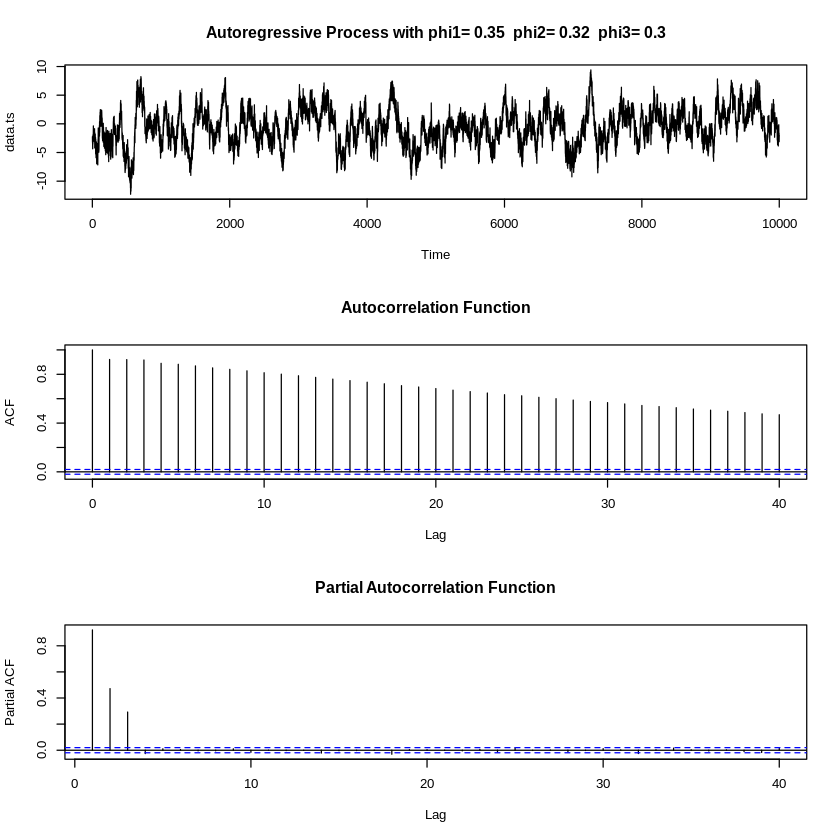

In [21]:
par(mfrow=c(3,1))
phi.1 = .35; phi.2 = .32; phi.3 = .3;
data.ts = arima.sim(n = 10000, list(ar = c(phi.1, phi.2, phi.3)))
plot(data.ts, main= paste("Autoregressive Process with phi1=",
phi.1," phi2=",phi.2," phi3=",phi.3) )
acf(data.ts, main="Autocorrelation Function")

acf(data.ts, type="partial", main="Partial Autocorrelation Function")

## Beveridge Wheat Price Data Set

Partial Autocorrelation Function and the Beveridge Wheat Price Data Set Here is a classic data set in Time Series Analysis, the good old Beveridge Wheat Price Index. You can get the numbers at the Time Series Data Library…just visit the website: http://datamarket.com/data/list/?q=provider:tsdl The data set originally appeared in a paper called “Weather and Harvest Cycles” (Beveridge, 1921) and has also been discussed in subsequent papers critiquing the original analysis, for example (Sargan, 1953) and (Granger & Hughes, 1971). While we note that there are issues with Beveridge’s analysis, we present the data as a nice illustration of the topic at hand. Can you follow along on this code? I have downloaded the data into a text file, removing some header information. Next, I create a time series with the data in the second column (the actual prices, starting in the year 1500) and create a “filter” with the simple moving average that uses 15 data points on either side of a given year to introduce some smoothing. We plot the original series and the smoothed series on the same axes.

In [24]:
install.packages("tseries")
library(tseries)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘zoo’, ‘quantmod’


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



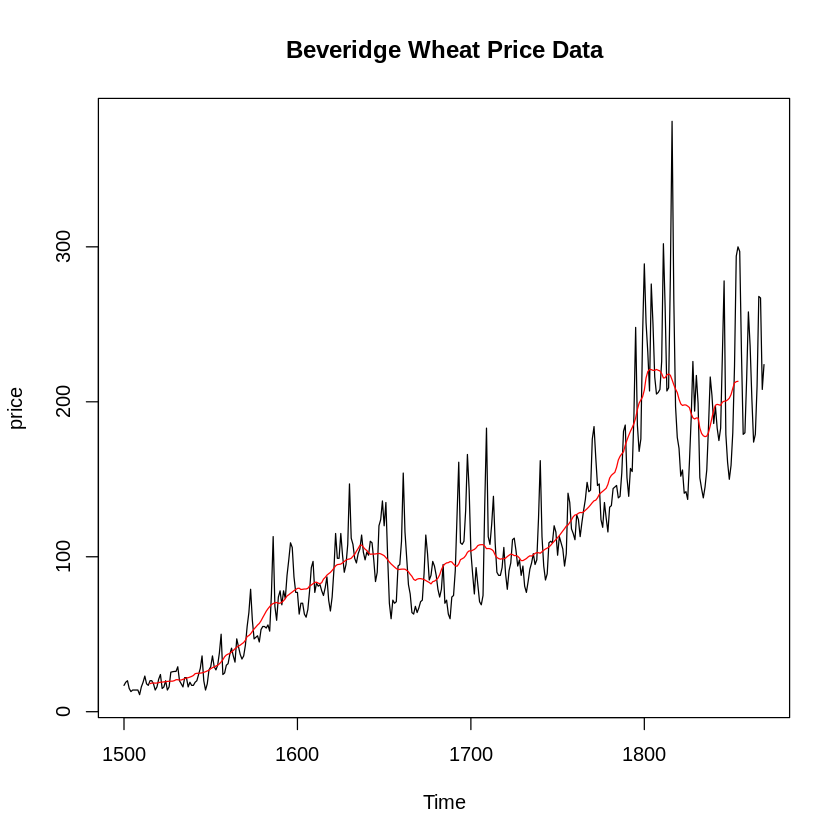

In [39]:
data(bev)
#beveridge = read.csv("beveridge-wheat-price-index-1500.csv", header=TRUE)
beveridge.ts = ts(bev, start=1500)
plot( beveridge.ts, ylab="price", main="Beveridge Wheat Price Data")
window=31
beveridge.MA_Smoother = filter(beveridge.ts, rep(1/window, window), sides = 2)
lines(beveridge.MA_Smoother , col="red")

Now Beveridge transformed his data by scaling each data point by its corresponding smoothed value. I’ve done this with the following lines, and plotted the usual graphs.The acf() function doesn’t like missing data, so the first and last 15 numbers are ignored or omitted with the clean-up function na.omit().

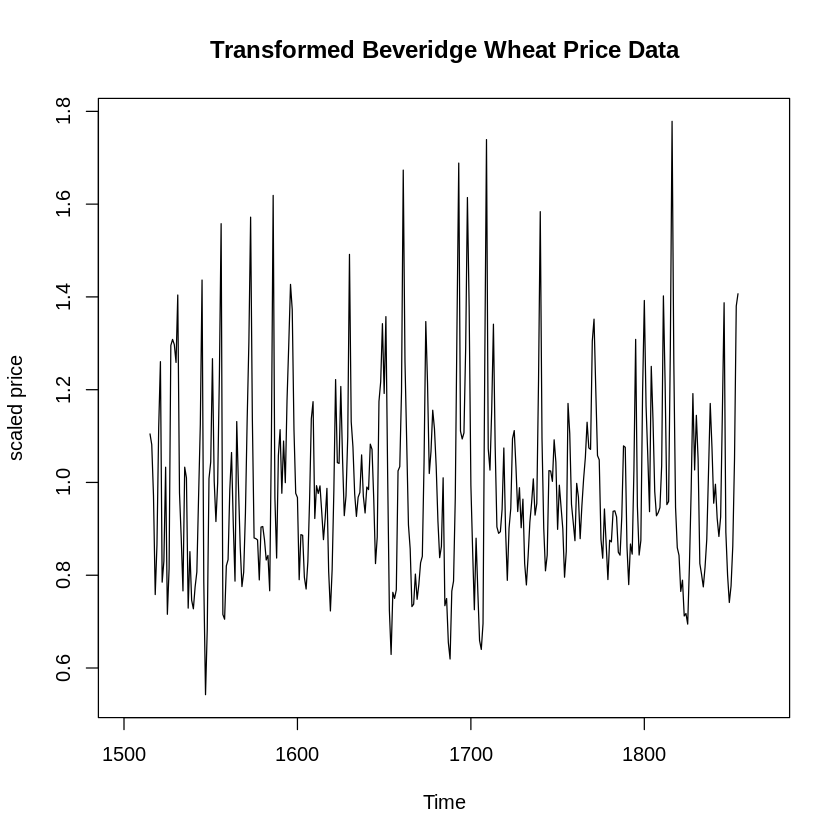

In [40]:
# par(mfrow=c(3,1))
Y = beveridge.ts/beveridge.MA
#Y=diff(log(beveridge.ts))
plot( Y, ylab="scaled price", main="Transformed Beveridge Wheat Price Data")

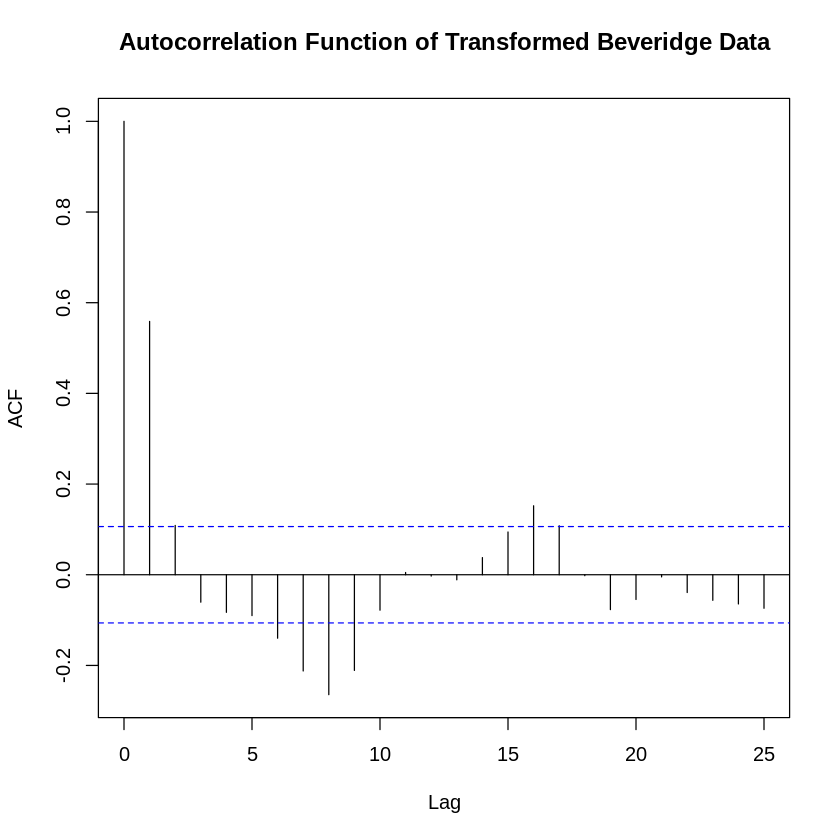

In [41]:
acf(na.omit(Y),
main="Autocorrelation Function of Transformed Beveridge Data")

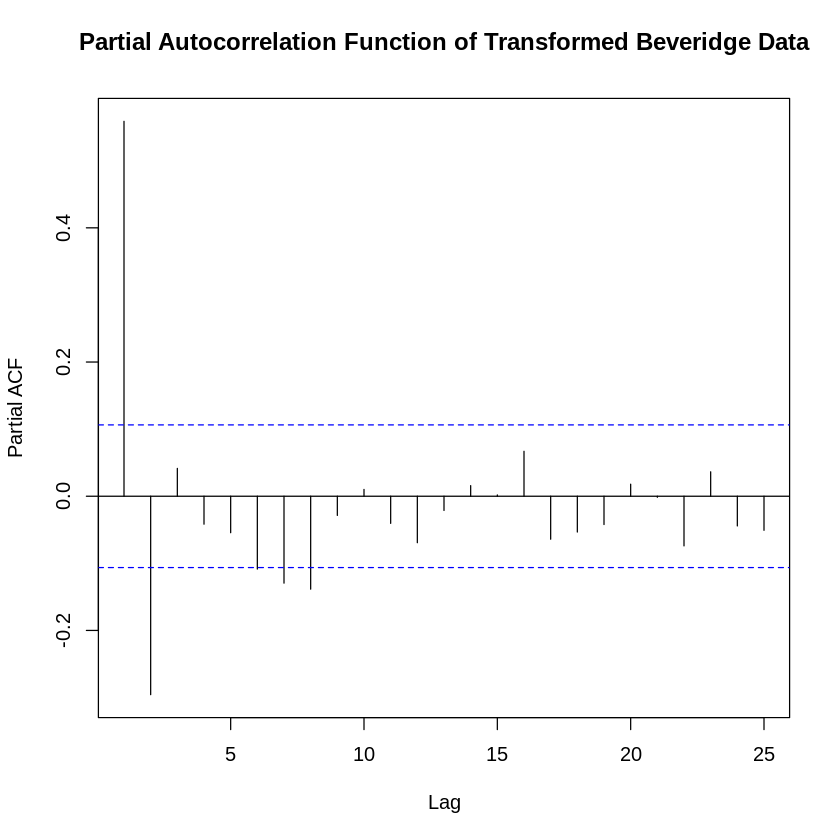

In [42]:
acf(na.omit(Y), type="partial",
main="Partial Autocorrelation Function of Transformed Beveridge Data")

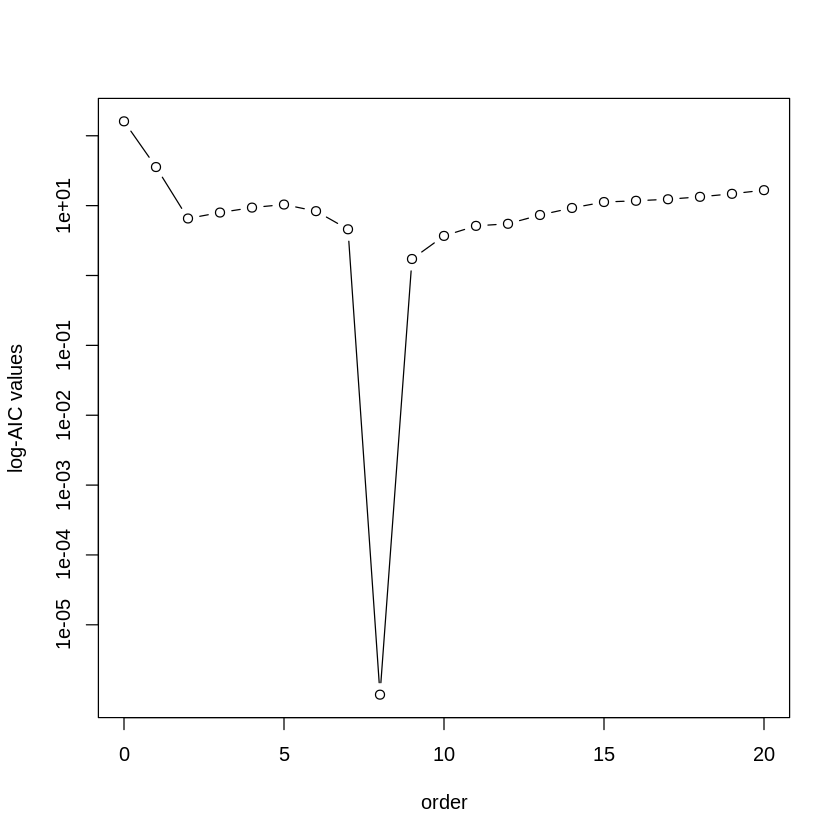

In [45]:
brev.ar.fit= ar(na.omit(Y), order.max = 20)
plot(c(0:20), brev.ar.fit$aic+.000001, type="b",log="y",xlab="order",ylab="log-AIC values")

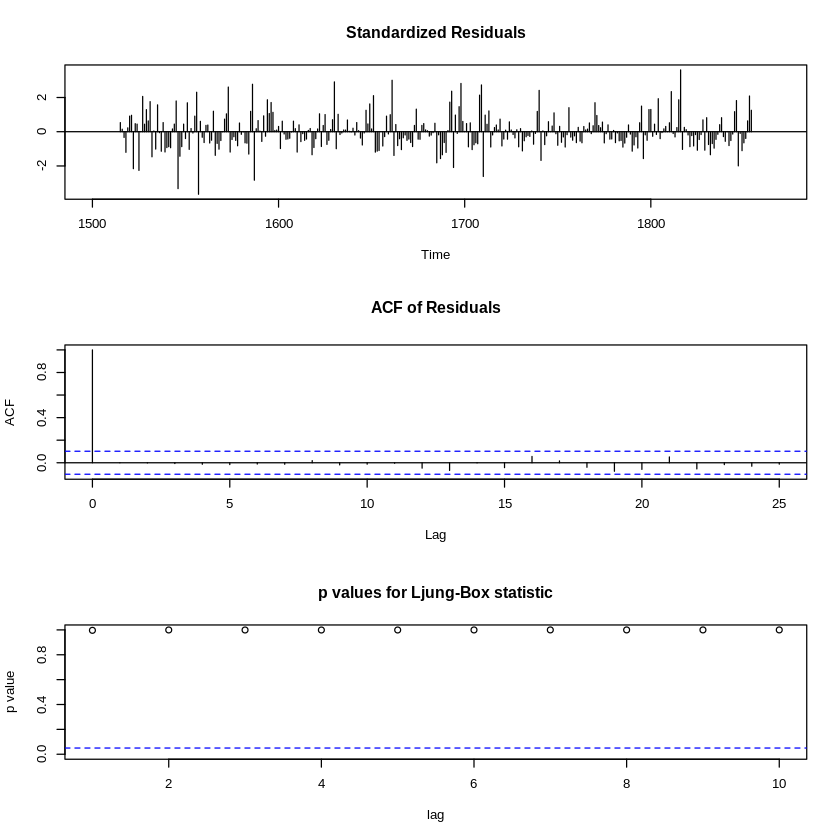

In [47]:
ARy1=arima(Y,c(8,0,0))
tsdiag(ARy1)

## simulate ARMA

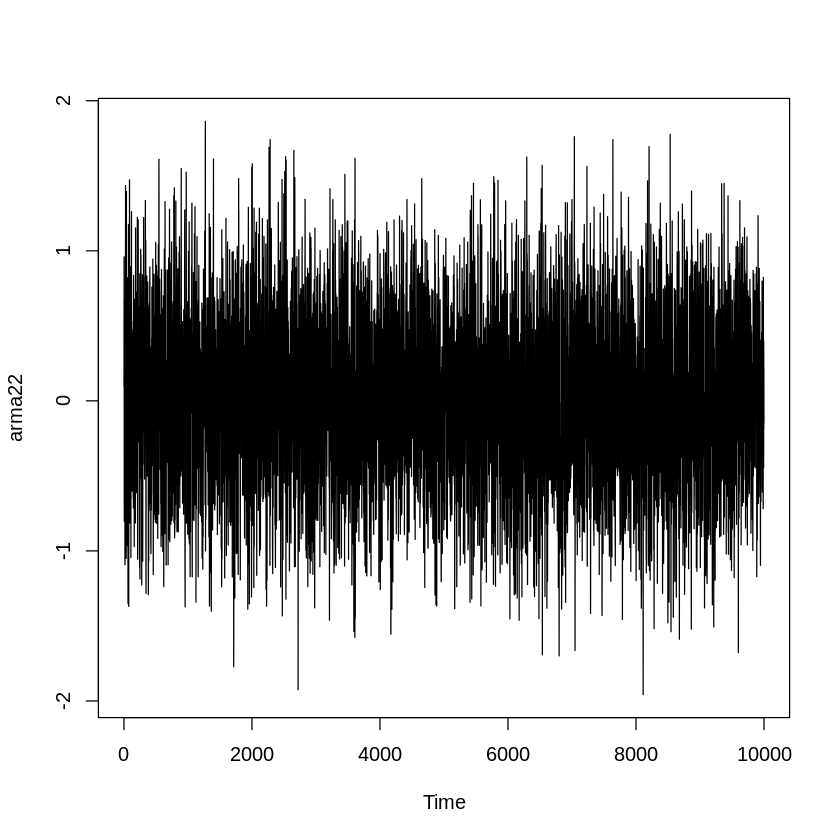

In [48]:
set.seed(2)
## Stationary ARMA(2,2)
arma22 = arima.sim(n = 10000, list(ar = c(0.88, -0.49), ma = c(-0.23, 0.25)), sd = sqrt(0.18))
plot (arma22)

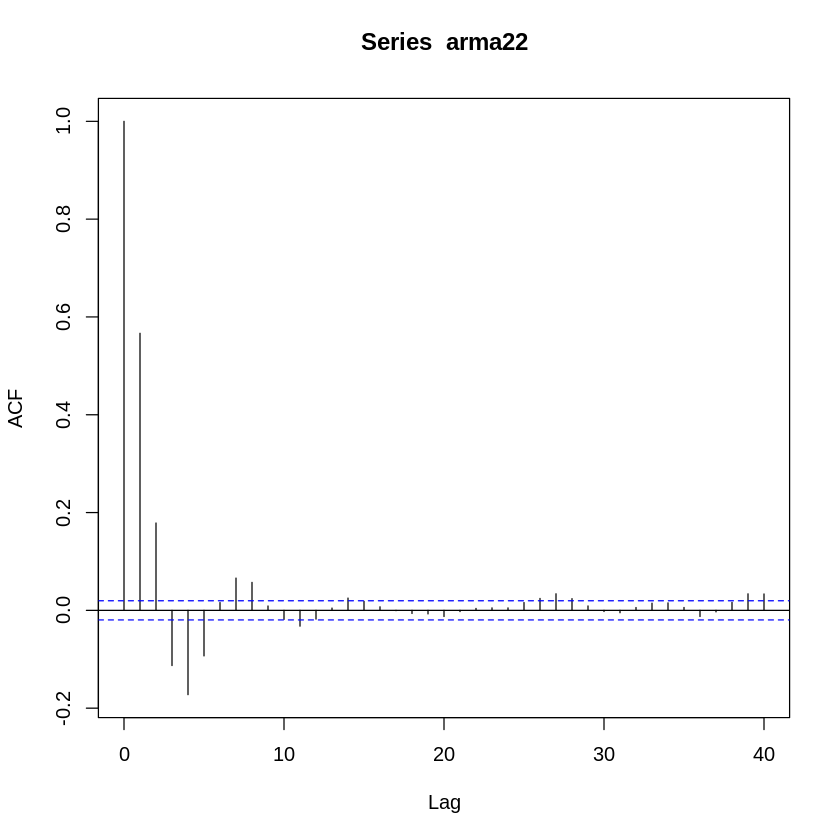

In [49]:
acf(arma22)

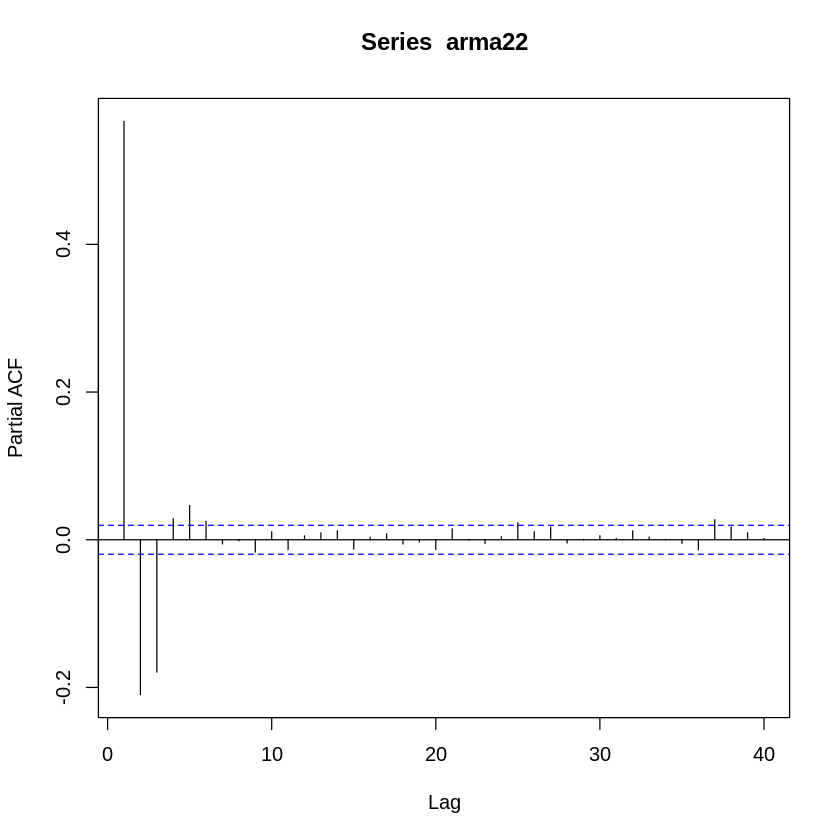

In [50]:
pacf(arma22)

It is clear that the ACF and PACF suggests p=5 and q=7 which is incorrect as we already know that this data is generated form ARMA with p=2 and q=2.

***We can not use ACF and PACF to determine the orders p,q for ARMA(p,q) process.***